import cv2: This imports the OpenCV library, which is used for image processing tasks.

import numpy as np: This imports the NumPy library, which is used for numerical computations in Python. It's commonly aliased as np for convenience.

from sklearn.cluster import KMeans: This imports the KMeans class from the scikit-learn library. KMeans is used for performing K-means clustering, which is the core algorithm for vector quantization in this code.

vector_quantization_compression: This is a function definition for performing vector quantization compression. It takes the original image and the number of clusters k as input.

pixels = image.reshape((-1, 3)): This line reshapes the image into a 2D array of pixels, where each row represents a pixel and the three columns represent the RGB values.

kmeans = KMeans(n_clusters=k): This line creates a KMeans object with k clusters.
kmeans.fit(pixels): This fits the KMeans model to the pixel data, performing clustering to find k centroids.

compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8): This line assigns each pixel to its nearest centroid and replaces the pixel values with the centroid values. It then converts the data type to uint8, which is the data type used for image pixels.

compressed_image = compressed_pixels.reshape(image.shape): This reshapes the compressed pixel array back to the original shape of the image.

return compressed_image: This returns the compressed image.

upload_image: This is a function definition for uploading an image from the local system in Google Colab.

from google.colab import files: This imports the files module from Google Colab, which provides functions for uploading and downloading files.

uploaded = files.upload(): This prompts the user to upload files from their local system.

for filename in uploaded.keys():: This loop iterates over the uploaded files.

return cv2.imread(filename): This reads the uploaded image file using OpenCV's imread function and returns the image.

original_image = upload_image(): This line calls the upload_image function to upload an image and assigns it to the variable original_image.

print("Original Image:"): This prints a message indicating that the original image is being displayed.

cv2.imshow("Original Image", original_image): This displays the original image using OpenCV's imshow function.

cv2.waitKey(0): This waits for a key press before closing the image window.

cv2.destroyAllWindows(): This closes all OpenCV windows.

k = 16: This sets the number of clusters (colors) for vector quantization to 16.
compressed_image = vector_quantization_compression(original_image, k): This line calls the vector_quantization_compression function with the original image and k as input, and assigns the compressed image to the variable compressed_image.

print("Compressed Image (k={}):".format(k)): This prints a message indicating that the compressed image is being displayed, along with the value of k.

cv2.imshow("Compressed Image", compressed_image): This displays the compressed image using OpenCV's imshow function.

cv2.waitKey(0): This waits for a key press before closing the image window.

cv2.destroyAllWindows(): This closes all OpenCV windows.



Saving 1442313353nasa-small.jpg to 1442313353nasa-small (1).jpg
Original Image:


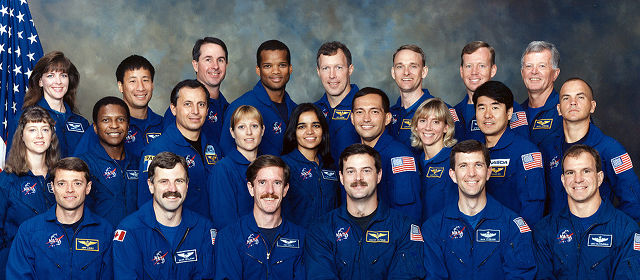

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Compressed Image (k=2):


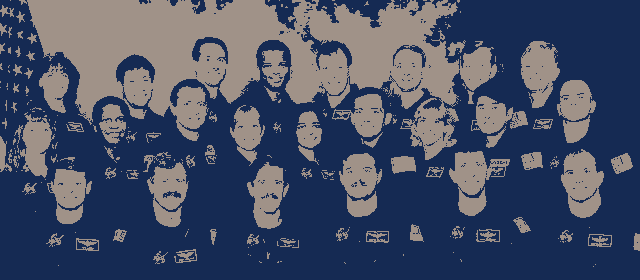

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from google.colab import files
from google.colab.patches import cv2_imshow
# Function to perform vector quantization compression
def vector_quantization_compression(image, k):
    # Reshape the image to 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
  # Compressing the image by replacing pixel values with cluster centroids
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)

    # Reshape the compressed pixels back to original shape of the image
    compressed_image = compressed_pixels.reshape(image.shape)

    return compressed_image

# Function to upload image from local system
def upload_image():
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        return cv2.imread(filename)

# Upload the image
original_image = upload_image()

# Display the original image
print("Original Image:")
cv2_imshow(original_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Define the number of colors (k) for vector quantization
k = 2

# Perform vector quantization compression
compressed_image = vector_quantization_compression(original_image, k)

# Display the compressed image
print("Compressed Image (k={}):".format(k))
cv2_imshow(compressed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
